## Segmentation dataset prepration

In [1]:
import numpy as np 
import pandas as pd 
import shutil
import tensorflow as tf
from zipfile import ZipFile 
import keras.backend as K
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
from PIL import Image

We want to store our dataset in a pandas dataframe for fast and accurate process. Then we will convert these dataframe to a Tensor. so first let's define our helper functions

In [2]:
def dataframe_creation(image_path, name):
    """
    This function is storing path of the images in a dataframe beside of each image id (in image name).
    Walk though the image_path and read the dirpathes and images name in each dir.
    Then append each image full path in a list.
    Extract the image name without the full path and extension and append it to the ids list.
    Please make sure each full path in first list is correspond to the id in second list at the same index.
    Arguments:
      image_path: root directory full path
      name: name for column of full pathes in dataframe
    return:
      df: a df contains ids and full path of each image id. call the ids column, id and pathes column, name.
          Please set the ids column to be index in this df.

    """
    path_img = list(map(lambda f: os.path.join(image_path, f), os.listdir(image_path)))
    
    id_img = list(map(lambda f: os.path.splitext(os.path.basename(f))[0].replace('_label', ''),path_img))

    df = pd.DataFrame({
        'id': id_img,
        name: path_img,
    }, columns=['id', name], index=None)
    df.set_index('id', inplace=True)

    return df
    

In [3]:
def display(display_list):
    plt.figure(figsize=(15, 15))

    title = ['Input Image', 'True Mask', 'Predicted Mask']

    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        # a function for showing images
        # please write a code to convert images from tensor to ordinary images
        # use https://docs.w3cub.com/tensorflow~2.3/keras/preprocessing/image/array_to_img
        #### Your Code goes here
        img1 = tf.keras.preprocessing.image.array_to_img(display_list[i], data_format='channels_last')
        plt.imshow(img1)
        ####
        plt.axis('off')
    plt.show()

Creating train and train_masks directories for stroring the processed images

In [4]:
!mkdir train
!mkdir train_masks

In [5]:
!gdown 1KWnX3eMPJrzhsegi0LmyGUbUV5pqKw_R

Downloading...
From: https://drive.google.com/uc?id=1KWnX3eMPJrzhsegi0LmyGUbUV5pqKw_R
To: /content/ss_dataset.zip
100% 5.59G/5.59G [01:15<00:00, 74.5MB/s]


In [6]:
!unzip ss_dataset.zip
##for unzip

Archive:  ss_dataset.zip
   creating: ss_dataset/
   creating: ss_dataset/3/
  inflating: ss_dataset/3/210.bmp    
  inflating: ss_dataset/3/65_label.bmp  
  inflating: ss_dataset/3/495.bmp    
  inflating: ss_dataset/3/266.bmp    
  inflating: ss_dataset/3/423_label.bmp  
  inflating: ss_dataset/3/518_label.bmp  
  inflating: ss_dataset/3/540_label.bmp  
  inflating: ss_dataset/3/423.bmp    
  inflating: ss_dataset/3/221.bmp    
  inflating: ss_dataset/3/391.bmp    
  inflating: ss_dataset/3/309_label.bmp  
  inflating: ss_dataset/3/70.bmp     
  inflating: ss_dataset/3/231.bmp    
  inflating: ss_dataset/3/90_label.bmp  
  inflating: ss_dataset/3/10.bmp     
  inflating: ss_dataset/3/554_label.bmp  
  inflating: ss_dataset/3/215.bmp    
  inflating: ss_dataset/3/425_label.bmp  
  inflating: ss_dataset/3/18_label.bmp  
  inflating: ss_dataset/3/435.bmp    
  inflating: ss_dataset/3/491_label.bmp  
  inflating: ss_dataset/3/468.bmp    
  inflating: ss_dataset/3/85_label.bmp  
  inflati

In [7]:
data_dir = '/content/ss_dataset'
img_size = 256

image_root = '/content/train'
label_root = '/content/train_masks'

if not os.path.isdir(image_root):
    os.mkdir(image_root)
if not os.path.isdir(label_root):
    os.mkdir(label_root)

images = list()
labels = list()

"""
Beacause your images stored beside correspond label, and their format is in .bmp, so
please first store path of all images in a common list.
Then separate labels (which have _label pattern in their name) from images and store them in 
images and labels lists.
For each image and label file, read it with PIL image lib. and resize them to 256*256.
Then convert them to png file
At last save them in image_root and label_root directories in a way none of the files with the same name are lost
for reading images:
    https://www.geeksforgeeks.org/python-pil-image-open-method/
for saving images:
    https://www.geeksforgeeks.org/python-pil-image-save-method/
"""
paths = []
for root, subdirs, files in os.walk(data_dir):
  for filename in files:
    f_path = os.path.join(root, filename)
    img = Image.open(f_path)
    img = img.resize((img_size, img_size))
    nameroot = root.split('/')[-1]
    f_name = os.path.splitext(filename)[0]
    filename = f'{nameroot}_{f_name}.png'
    if '_label' in f_name:
      label_filepath = os.path.join(label_root, filename)
      img.save(label_filepath)
      labels.append(label_filepath)
    else:
      image_filepath = os.path.join(image_root, filename)
      img.save(image_filepath)
      images.append(image_filepath)
################################################

In [8]:
!rm -r ss_dataset

In [9]:
print("Train set:  ", len(os.listdir("/content/train")))
print("Train masks:", len(os.listdir("/content/train_masks")))

Train set:   2308
Train masks: 2308


In [10]:
## Call the dataframe_creation function with apprieciate arguments to get a 
## suitable dataframes for images and masks. Call the images pathes column's name "image_path"
## and column for masks name "mask_name"
## In the end, create a new column in df of images called "mask_path" and fill it with "mask_path" column of the mask's df
df_img = dataframe_creation( name='image_path',image_path=image_root)
df_mask = dataframe_creation(name='mask_path',image_path=label_root)
df = df_img.merge(df_mask, how='inner', on='id')
print(df)

                     image_path                             mask_path
id                                                                   
0_662  /content/train/0_662.png  /content/train_masks/0_662_label.png
1_110  /content/train/1_110.png  /content/train_masks/1_110_label.png
0_746  /content/train/0_746.png  /content/train_masks/0_746_label.png
3_270  /content/train/3_270.png  /content/train_masks/3_270_label.png
3_182  /content/train/3_182.png  /content/train_masks/3_182_label.png
...                         ...                                   ...
3_469  /content/train/3_469.png  /content/train_masks/3_469_label.png
0_403  /content/train/0_403.png  /content/train_masks/0_403_label.png
1_25    /content/train/1_25.png   /content/train_masks/1_25_label.png
0_761  /content/train/0_761.png  /content/train_masks/0_761_label.png
0_115  /content/train/0_115.png  /content/train_masks/0_115_label.png

[2308 rows x 2 columns]


In [11]:
img_size = [256, 256]

def data_augmentation(img, mask_img):
    """
    A function for data augmentation.
    We wanna just do some flips.
    Just make a random number, if it was greater than 0.5 do a lef_right flip
    hint:
      https://www.tensorflow.org/api_docs/python/tf/random/uniform
      https://www.tensorflow.org/api_docs/python/tf/image/flip_left_right
    Arguments:
      img: image tensor
      mask_img: mask image tensor
    return:
      img, mask_img
    """
    rn=tf.random.uniform((1,))
    if 0.5 < rn:
      img = tf.image.flip_left_right(img)
      mask_img = tf.image.flip_left_right(mask_img)
    return img, mask_img
    ################################################

def preprocessing(path, mask_path):
    '''
    Do the usual preprocessing steps for image processing algorithms
    Read image tensors. decode them, resize to img_size, cast them fo float dtype and normalize between 0-1
    Hint:
      https://www.tensorflow.org/api_docs/python/tf/io/read_file
      https://www.tensorflow.org/api_docs/python/tf/io/decode_jpeg
      https://www.tensorflow.org/api_docs/python/tf/image/resize
      https://www.tensorflow.org/api_docs/python/tf/cast
    Set channels in decoding to 3
    Arguments:
      path: image path
      mask_path: mask image path
    return:
      pre_processed image and mask image tensors
    '''
    img = tf.io.read_file(path)
    mask_img = tf.io.read_file(mask_path)
    img = tf.io.decode_jpeg(img)
    mask_img = tf.io.decode_jpeg(mask_img)
    img = tf.image.resize(img, img_size)
    mask_img = tf.image.resize(mask_img, img_size)
    img = tf.cast(img, dtype=float)
    mask_img = tf.cast(mask_img, dtype=float)
    img = img / 255.0
    mask_img = mask_img / 255.0
    return img, mask_img
    ################################################

def create_dataset(df, train = False):
    '''
    A function for applying preprocessing and augmentation steps.
    Augment data just in train mode.
    First make a Dataset of tensors to reach high speed and ability.
    Then apply needed steps.
    For creating dataset, please use tensorflow-tf-data-dataset-from_tensor_slices to get
      a dataset of images and correspondig masks path. use values of image_path and mask_path columns of your dataframe
    Then use map function of created ds and call above functions respectively.
    use tf.data.AUTOTUNE in map function
    Hint:
      https://www.geeksforgeeks.org/tensorflow-tf-data-dataset-from_tensor_slices/
      https://www.tensorflow.org/api_docs/python/tf/data/Dataset
    Arguments:
      df: dataframe of images with masks path.
      train: boolean for switching between train and inference mode.
    return:
      dataset
    '''
    ds = tf.data.Dataset.from_tensor_slices(df.values)
    ds = ds.map(lambda x: preprocessing(x[0], x[1]),
                num_parallel_calls=tf.data.AUTOTUNE)
    if train:
      ds = ds.map(data_augmentation, num_parallel_calls=tf.data.AUTOTUNE)
    return ds
    ################################################

In [12]:
### first split the dataframe to train and val (with train_test_split) then create dataset from each df
train_df, valid_df = train_test_split(df)
train = create_dataset(train_df, train=True)
valid = create_dataset(valid_df, train=False)

In [13]:
TRAIN_LENGTH = len(train_df)
BATCH_SIZE = 24
BUFFER_SIZE = 1000

In [14]:
## The last step for creating a tf.data.Dataset is to batch and shuffle them
## for this please cache train dataset, then shuffle in the amount of BUFFER_SIZE, then 
## batch them in the amount of BATCH_SIZE and repeat this process. Finally prefetch the train_data with 
## buffer_size=tf.data.AUTOTUNE (https://www.tensorflow.org/api_docs/python/tf/data/Dataset)
## Hint: name of needed functions are in the description, just call
## for valid_dataset, just batch in the amount of BATCH_SIZE
################################################
############## YOUR CODES GO HERE ##############
train_dataset = train.cache()
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.batch(BATCH_SIZE)
train_dataset = train_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
valid_dataset = valid.batch(BATCH_SIZE)
################################################

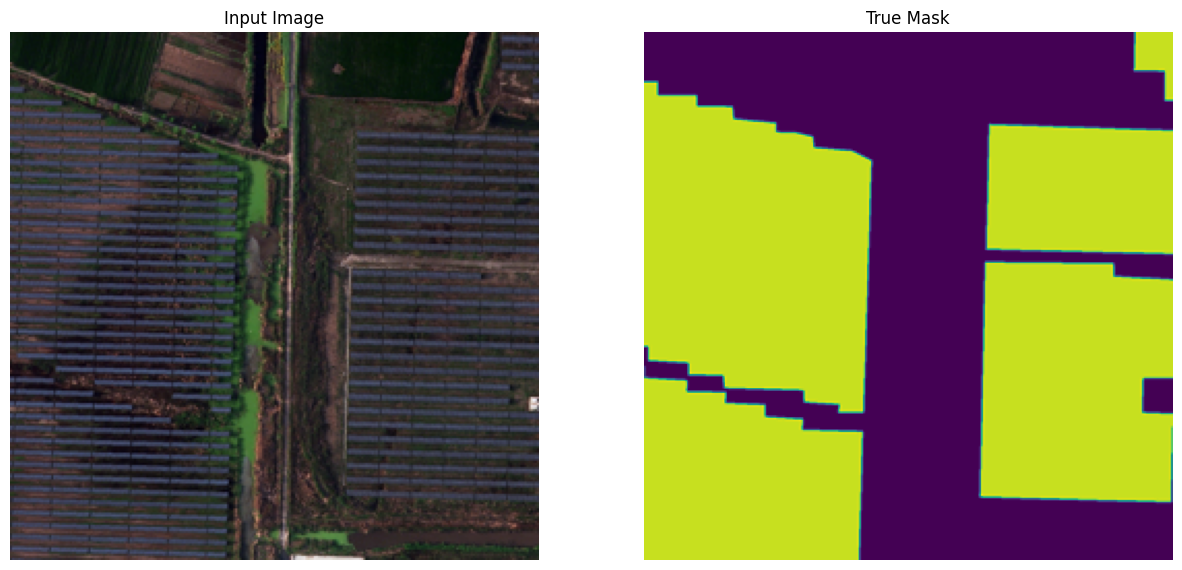

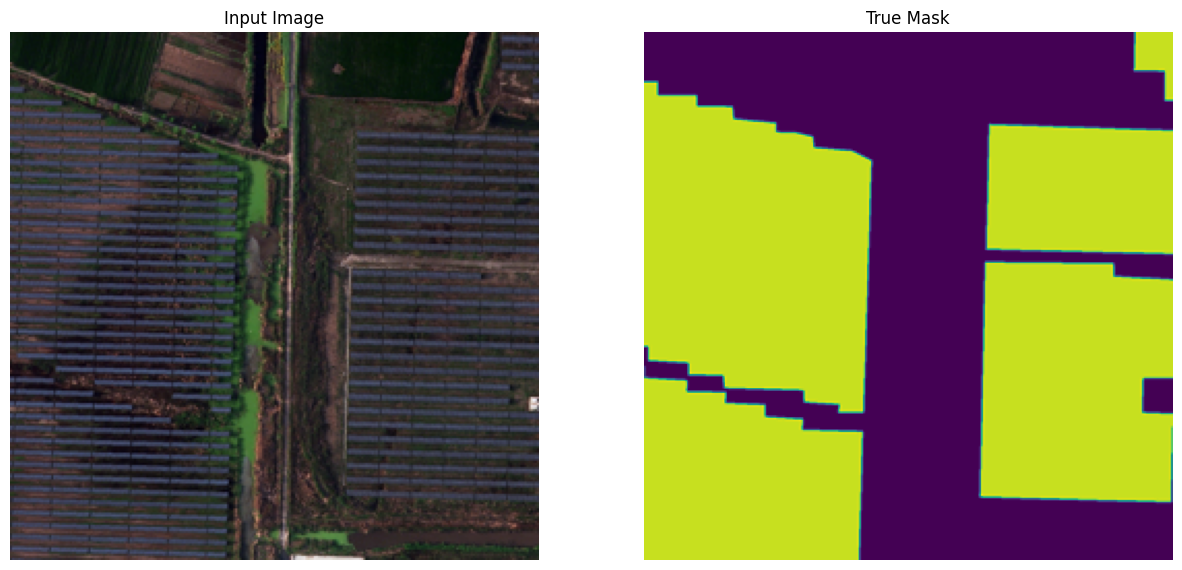

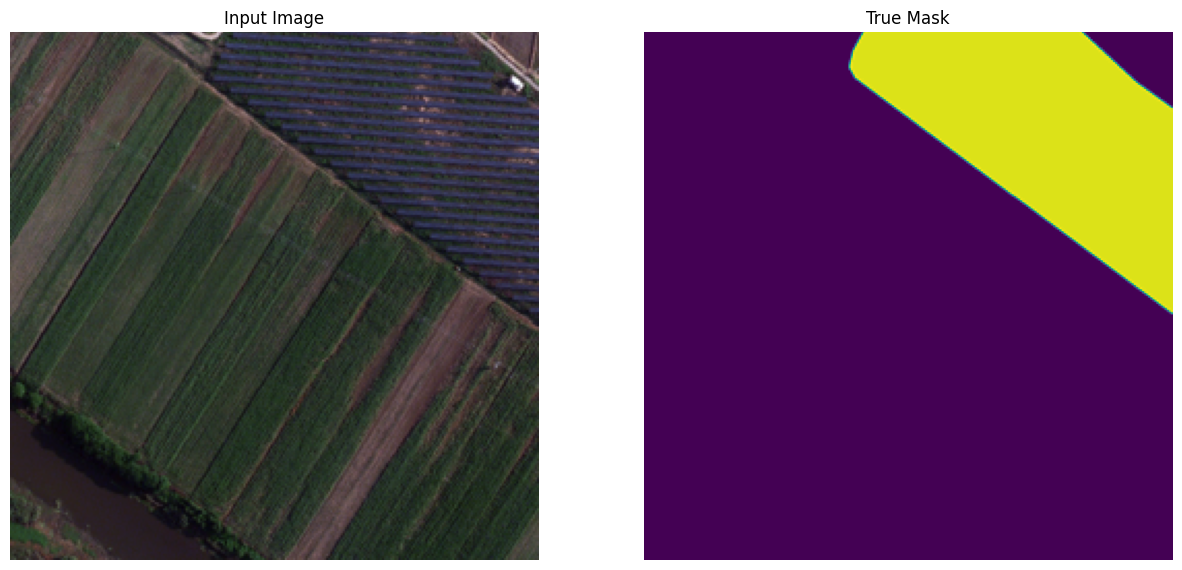

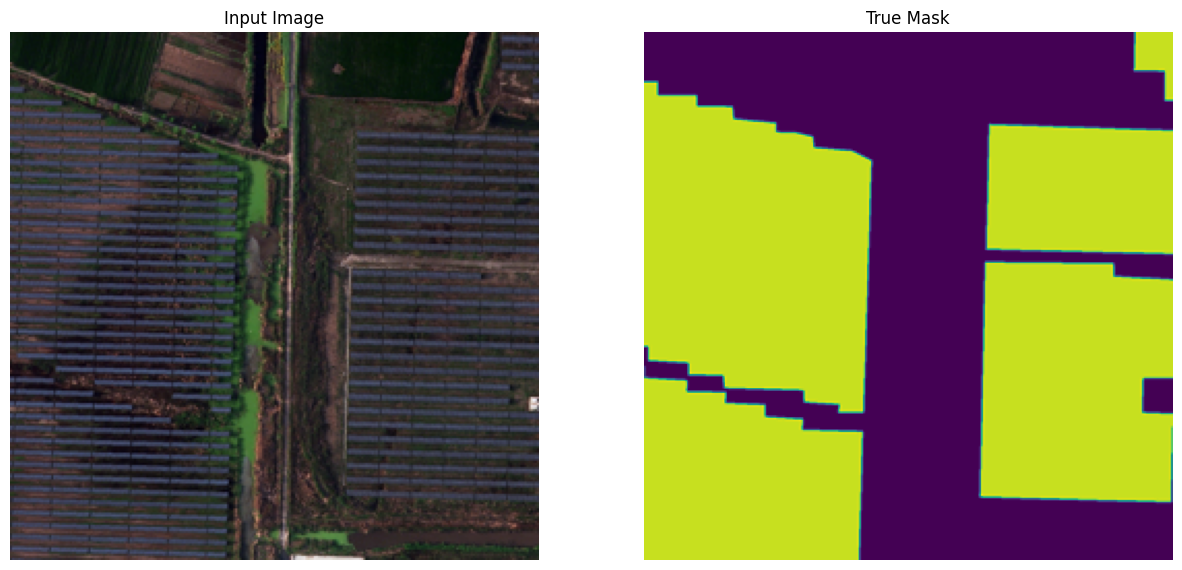

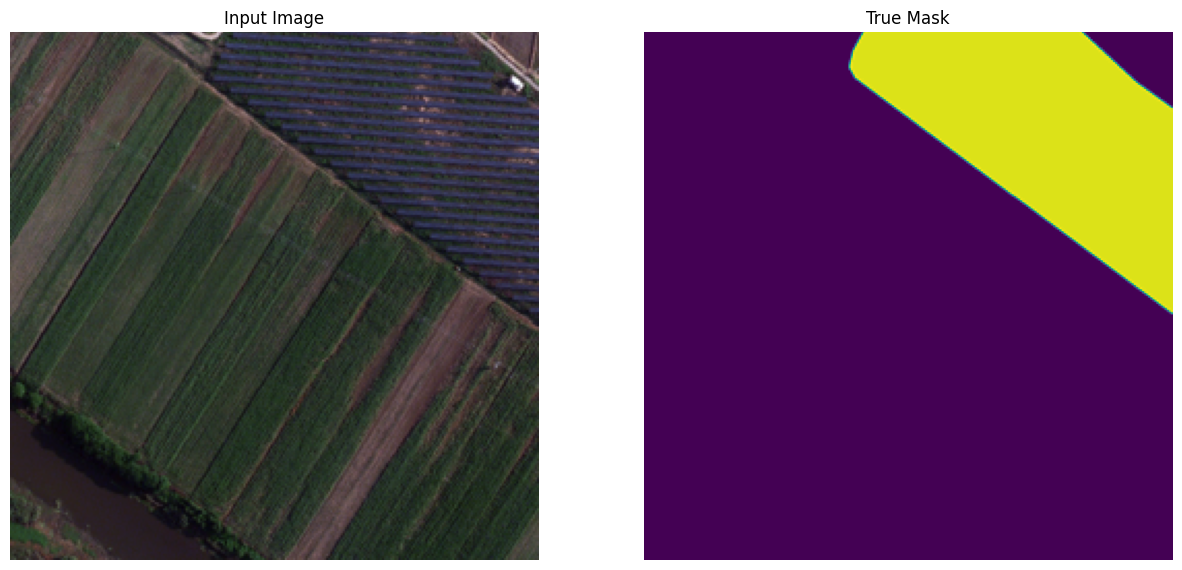

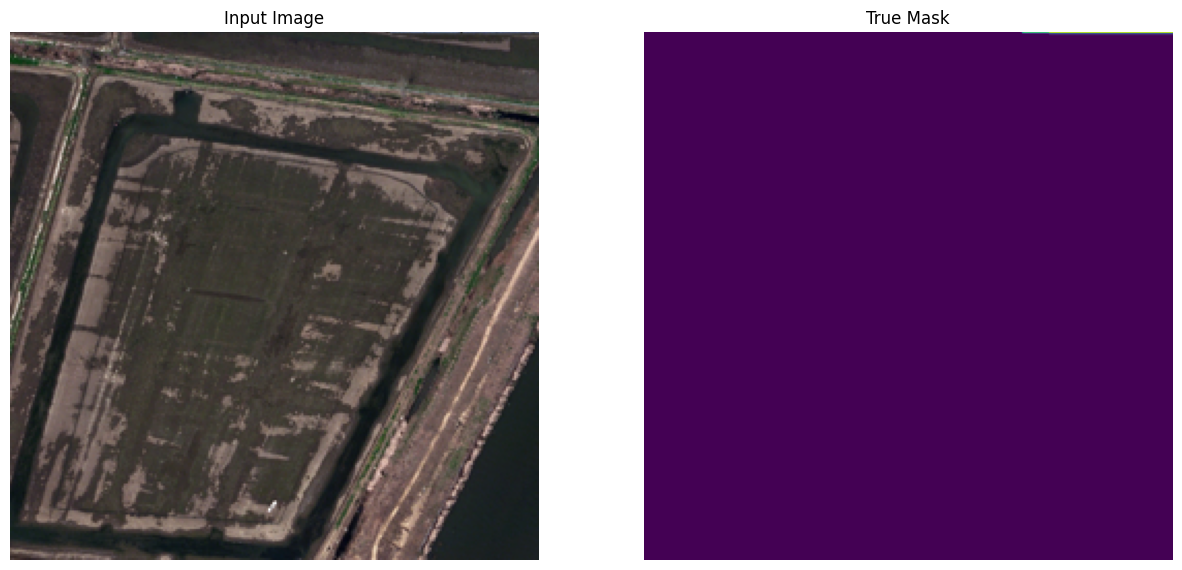

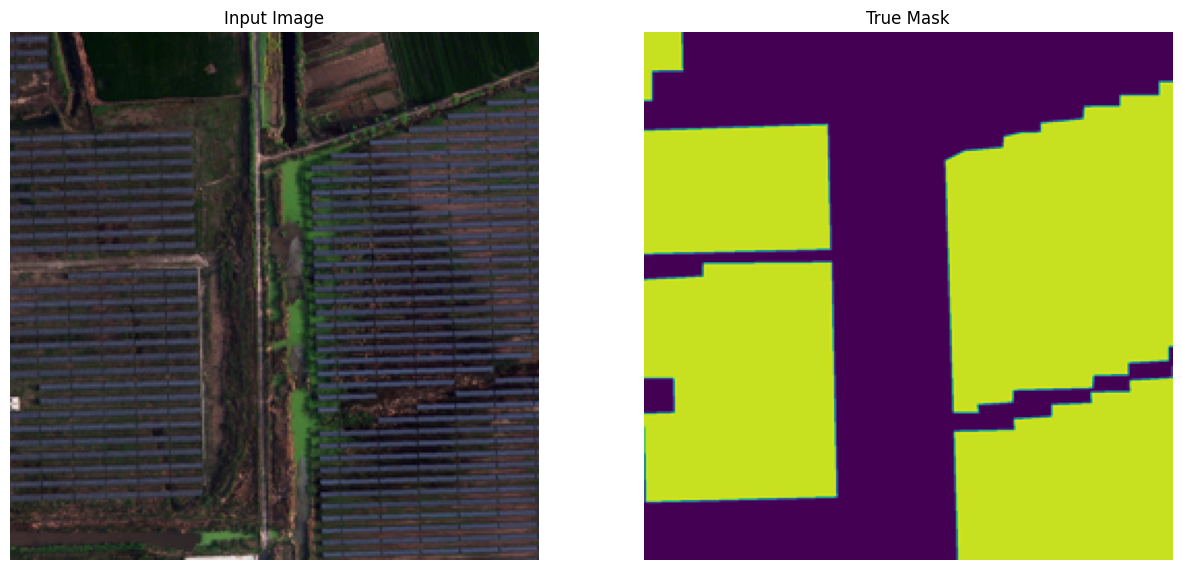

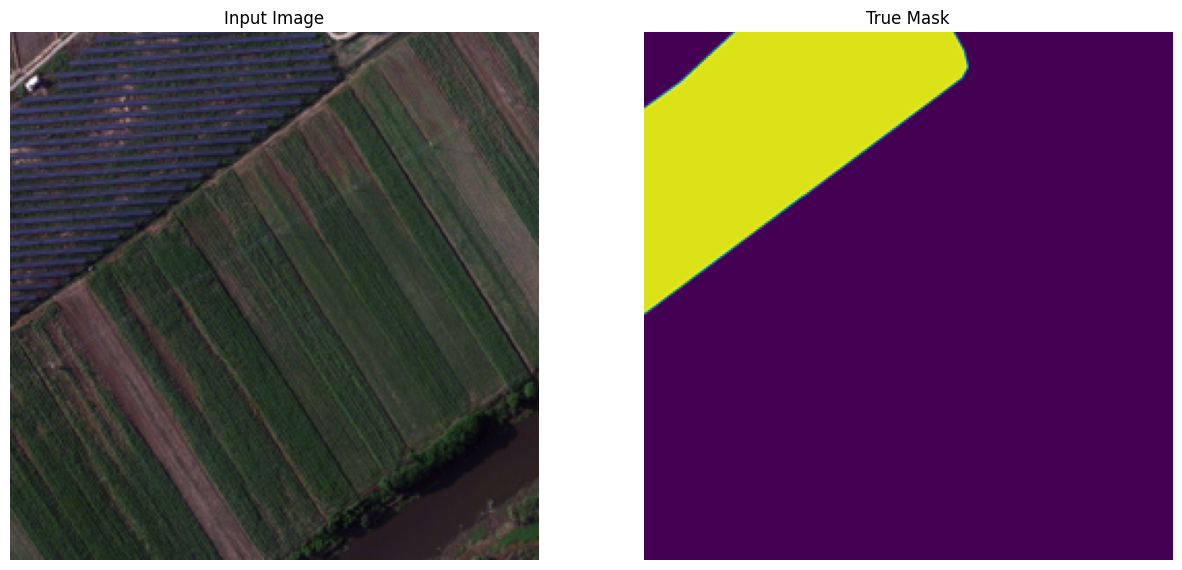

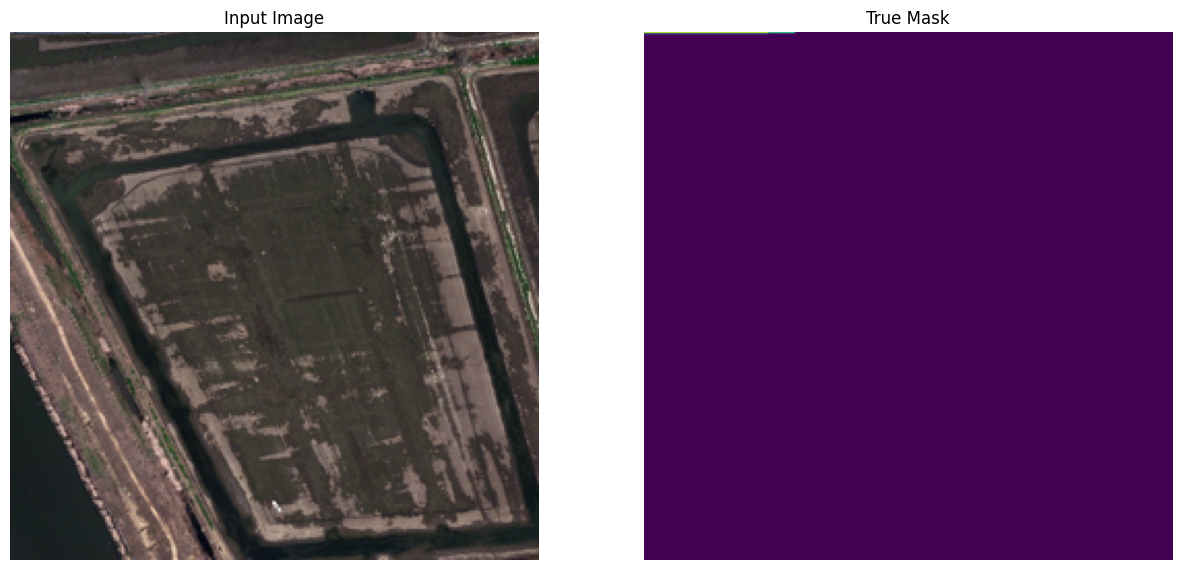

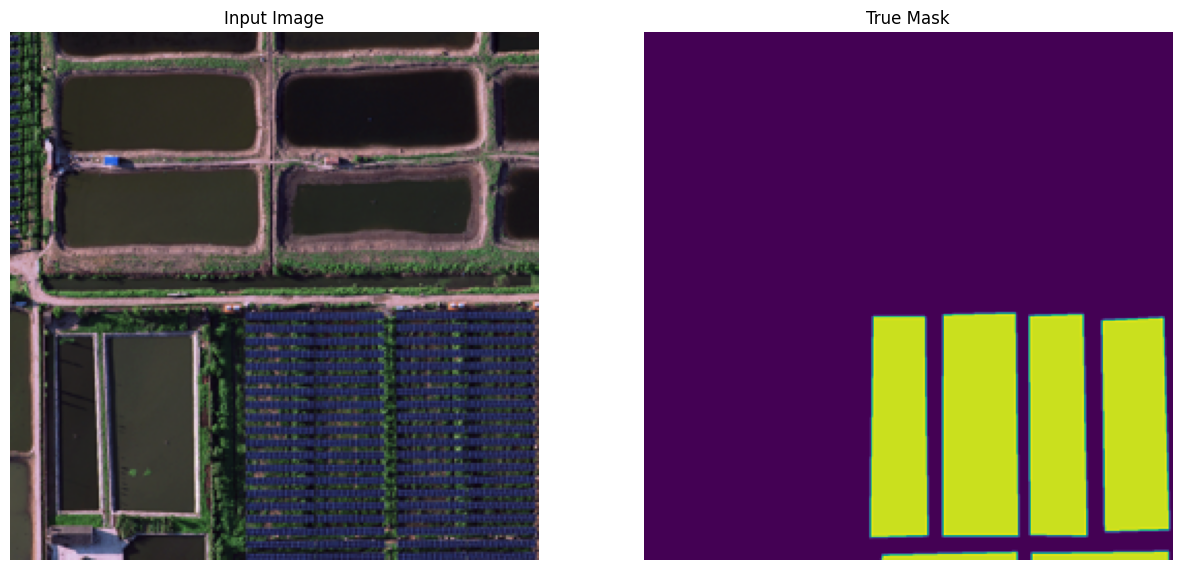

In [15]:
## let's see some of the images ans masks
for i in range(5):
    for image, mask in train.take(i):
        sample_image, sample_mask = image, mask
        display([sample_image, sample_mask])

Till now we created our dataset, let's implement the model and train it on created dataset

In this notebook we're going to implement [U-Net](https://arxiv.org/abs/1505.04597) model for semantic segmentation.
For its backbone, we'll use [MobileNetV2](https://arxiv.org/abs/1801.04381) architecture.

## U-Net model for segmentation

In [16]:
"""
First load the pre-trained weights of mobilenetv2. Because amount of our data is limited its better to use 
transfer learning. Set the input_shape of the model to img_size, and please don't include the top of this model.
According to U-Net architecture, because we have skip connections in multiple steps of backbone, please 
get the below layers's endpoint from backbone:
    block_1_expand_relu   # 64x64
    block_3_expand_relu   # 32x32
    block_6_expand_relu   # 16x16
    block_13_expand_relu  # 8x8
    block_16_project
Store them in a list.
Create your model with mobilenetv2 input layer and extracted output layers.
Freeze backbone and don't train it.
Hint:
  https://www.tensorflow.org/api_docs/python/tf/keras/applications/mobilenet_v2/MobileNetV2
  https://www.tensorflow.org/api_docs/python/tf/keras/Model
"""
m_net = tf.keras.applications.MobileNetV2(input_shape=(img_size[0], img_size[1], 3),
                                              weights='imagenet',
                                              include_top=False)
skip_layers = [
    m_net.get_layer('block_1_expand_relu').output,
    m_net.get_layer('block_3_expand_relu').output,
    m_net.get_layer('block_6_expand_relu').output,
    m_net.get_layer('block_13_expand_relu').output,
    m_net.get_layer('block_16_project').output,
]
backbone = tf.keras.Model(
    inputs=m_net.layers[0].output,
    outputs=skip_layers)
backbone.trainable = False

9406464/9406464 [==============================] - 0s 0us/step


In [17]:
def upsample(filters, size):
    '''
    in this function we have to define the decoder section of the u-net model.
    we call it upsampling process.
    for each down-sampling in the backbone, we have a up-sampling in decoder.
    we should implement decoder in a way to double the spatial resolution of the input tensor.
    bacause the inputs, are our features, we should learn how to double the spatial resolution instead of
    resizing methods for ignoring inserting fake features to our feature vectors.
    it's a crucial statement.
    so use a transpose conv2d function and double spatial resolution of the input tensor
    this layer should get the filters as output channel, size for filter size, 2 for stride.
    use same padding in it.
    define the initializer for kernel initializer and use False for use_bias.
    Use a sequential model for stacking layers.
    Finally add a batchnormalization layer at the end of the model. (use dafult args)
    Hint:
      https://www.tensorflow.org/api_docs/python/tf/keras/Sequential
      https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2DTranspose
      https://www.tensorflow.org/api_docs/python/tf/keras/layers/BatchNormalization
    Atguments:
      filters: number of input channels
      size: spatial dimention of filters
    return:
      decoder layers
    '''
    initializer = tf.random_normal_initializer(0., 0.02)
 
    result = tf.keras.Sequential([
      tf.keras.layers.Conv2DTranspose(filters, kernel_size=size, kernel_initializer=initializer,
                                      strides=2, use_bias=False,padding='same'),
      tf.keras.layers.BatchNormalization(),
    ])
    

    ################################################

    return result

up_stack = [
    upsample(512, 3),  # 4x4 -> 8x8
    upsample(256, 3),  # 8x8 -> 16x16
    upsample(128, 3),  # 16x16 -> 32x32
    upsample(64, 3),   # 32x32 -> 64x64
]

In [18]:
def unet_model(output_channels):
    '''
    Now we have to stack backbone with decoder.
    First define a Input layer to get the images (consider the img_size).
    Then give the result to the backbone and get the outputs of this encoder.
    you will get a list of outputs.
    store the last element of this list for input of the decoder.
    Reverse the outputs list except last element and keep them as skip connections.
    now iterate up_stack and skips lists simultaneously, give the previous last feature vector to the
    decoder part and get the output. concat that with current skip from backbone and name it as same as
    the last output to make it input of the next decoder layer.
    Finally, use a transpose conv2d layer to get the final coarse map.
    this layer should get the output_channels as output channel, 3 for filter size, 2 for stride, sigmoid for activation function.
    use same padding in it.
    give the last output of the decor to it and use as your model's main output.
    Hint:
      http://man.hubwiz.com/docset/TensorFlow.docset/Contents/Resources/Documents/api_docs/python/tf/keras/layers/Input.html
      https://www.tensorflow.org/api_docs/python/tf/keras/layers/Concatenate
      https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2DTranspose
      https://www.tensorflow.org/api_docs/python/tf/keras/Model
    '''
    inp = tf.keras.layers.Input((img_size[0], img_size[1], 3))
    features = backbone(inp)
    u_inp = features[-1]
    features = features[-2::-1]
    for us, feature in zip(up_stack, features):
      upsampled = us(u_inp)
      u_inp = tf.concat((feature, upsampled), axis=-1)
    outputs = tf.keras.layers.Conv2DTranspose(output_channels, kernel_size=3,
        padding='same', strides=2, activation='sigmoid')(u_inp)
    model = tf.keras.Model(inputs=inp, outputs=outputs)
    return model
    ################################################

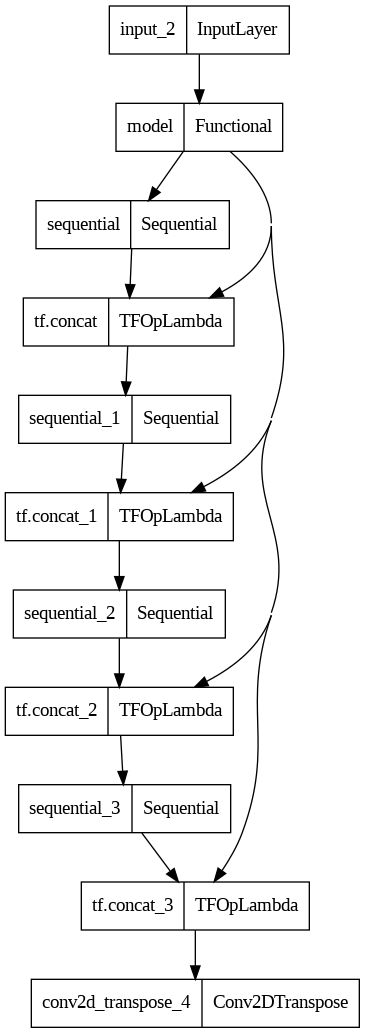

In [19]:
## let's define the loss function. dice loss function is a good choice for semantic segmenation task
## See https://dev.to/_aadidev/3-common-loss-functions-for-image-segmentation-545o
def dice_coef(y_true, y_pred, smooth=1):
    intersection = K.sum(y_true * y_pred, axis=[1,2,3])
    union = K.sum(y_true, axis=[1,2,3]) + K.sum(y_pred, axis=[1,2,3])
    return K.mean( (2. * intersection + smooth) / (union + smooth), axis=0)

def dice_loss(in_gt, in_pred):
    return 1-dice_coef(in_gt, in_pred)

## define model with  output channel. Name it model.
## then compile the model with adam optimizer, dice loss
## please introduce binary_accuracy and dice coef to the model to log them as a metric during training
## hint: https://keras.io/api/models/model_training_apis/

model = unet_model(1)
model.compile(optimizer='adam', loss=dice_loss, metrics=[dice_coef, 'binary_accuracy'])

## plot the graph of the model with each layer's shape
## hint: https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model

tf.keras.utils.plot_model(model)


1/1 [==============================] - 3s 3s/step


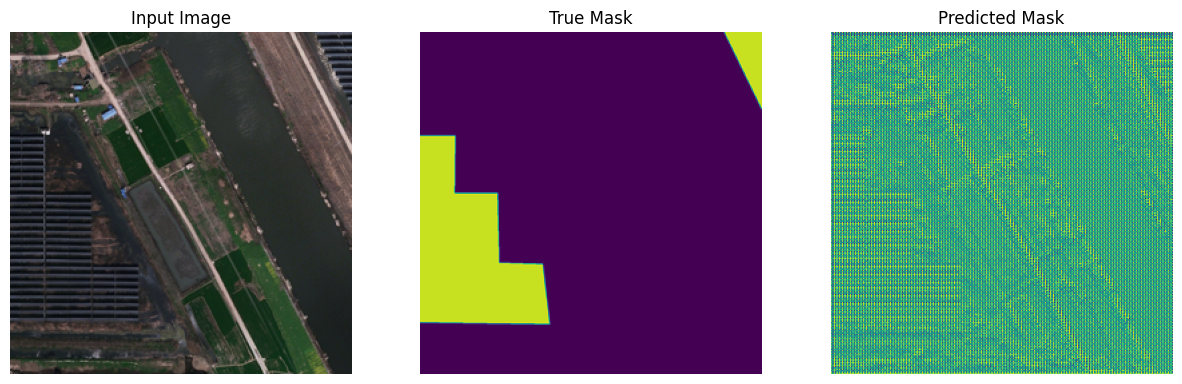

In [20]:
for images, masks in train_dataset.take(1):
    for img, mask in zip(images, masks):
        sample_image = img
        sample_mask = mask
        break

def visualize(display_list):
    plt.figure(figsize=(15, 15))
    title = ['Input Image', 'True Mask', 'Predicted Mask']
    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

def show_predictions(sample_image, sample_mask):
    pred_mask = model.predict(sample_image[tf.newaxis, ...])
    pred_mask = pred_mask.reshape(img_size[0],img_size[1],1)
    visualize([sample_image, sample_mask, pred_mask])
    

## let's see some the outputs of pre-trained model
show_predictions(sample_image, sample_mask)

In [21]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 model (Functional)             [(None, 128, 128, 9  1841984     ['input_2[0][0]']                
                                6),                                                               
                                 (None, 64, 64, 144                                               
                                ),                                                                
                                 (None, 32, 32, 192                                         

In [ ]:
### first define a early stop callback for preventing overfitting.
### set patience=4 and True the restore_best_weight 
### Hint: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

############################################
######### YOUR CODE GOES HERE ###############
############################################

stp = tf.keras.callbacks.EarlyStopping(patience=4,restore_best_weights=True)

# Let's observe how the model improves while it is training. 
# To accomplish this task, a callback function is defined below.
class DisplayCallback(tf.keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs=None):
        if (epoch + 1) % 5 == 0:
            show_predictions(sample_image, sample_mask)

EPOCHS = 30

### Define the STEPS_PER_EPOCH and fit the model
### use train_dataset and EPOCHS and STEPS_PER_EPOCH for training process
### use valid_dataset for validation and introduce callbacks to the model
### save history

STEPS_PER_EPOCH = 10
history = model.fit(train_dataset, epochs=EPOCHS,
                    steps_per_epoch=STEPS_PER_EPOCH,
                    validation_data=valid_dataset,
                    callbacks=[stp, DisplayCallback()])

Epoch 1/30
10/10 [==============================] - 250s 25s/step - loss: 0.7583 - dice_coef: 0.2417 - binary_accuracy: 0.2759 - val_loss: 0.6370 - val_dice_coef: 0.3721 - val_binary_accuracy: 0.6495
Epoch 2/30
10/10 [==============================] - 184s 20s/step - loss: 0.6608 - dice_coef: 0.3392 - binary_accuracy: 0.6198 - val_loss: 0.5242 - val_dice_coef: 0.4820 - val_binary_accuracy: 0.6891
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 0.5767 - dice_coef: 0.4233 - binary_accuracy: 0.7053

In [ ]:
### let's see some the new predictions
for i in range(5):
    for image, mask in valid.take(i):
        sample_image, sample_mask = image, mask
        show_predictions(sample_image, sample_mask)

In [ ]:
### save final checkpoints to the disk
### Use h5 extension
### Hint: https://www.tensorflow.org/guide/keras/save_and_serialize
model.save('model.h5', save_format='h5')
